In [73]:
#importing necessary dependencies
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [74]:
#reading data
data = pd.read_csv('Desktop/adult.data', sep=',', skipinitialspace = True)

About this file

Attributes:

income: >50K, <=50K (TO BE PREDICTED)

age: continuous

workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked

fnlwgt: continuous

education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool

education-num: continuous

marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse

occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces

relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried

race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black

sex: Female, Male

capital-gain: continuous

capital-loss: continuous

hours-per-week: continuous

native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands

In [75]:
data.head()

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [76]:
#changing column names in our dataframe
cols = ['age', 'work-class', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']
data.columns = cols

In [78]:
data.head()

,age,work-class,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [79]:
#data statistics like mean, median, min value, max, q1, q3
data.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [80]:
data.info() #to check the types of data we have 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
age               32560 non-null int64
work-class        32560 non-null object
fnlwgt            32560 non-null int64
education         32560 non-null object
education-num     32560 non-null int64
marital-status    32560 non-null object
occupation        32560 non-null object
relationship      32560 non-null object
race              32560 non-null object
sex               32560 non-null object
capital-gain      32560 non-null int64
capital-loss      32560 non-null int64
hours-per-week    32560 non-null int64
native-country    32560 non-null object
income            32560 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [81]:
numerical_att = data.select_dtypes(include=['int64']) # selecting numerical attributes from our dataframe

numerical_att.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
0,50,83311,13,0,0,13
1,38,215646,9,0,0,40
2,53,234721,7,0,0,40
3,28,338409,13,0,0,40
4,37,284582,14,0,0,40


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000DD19240>,
      dtype=object)

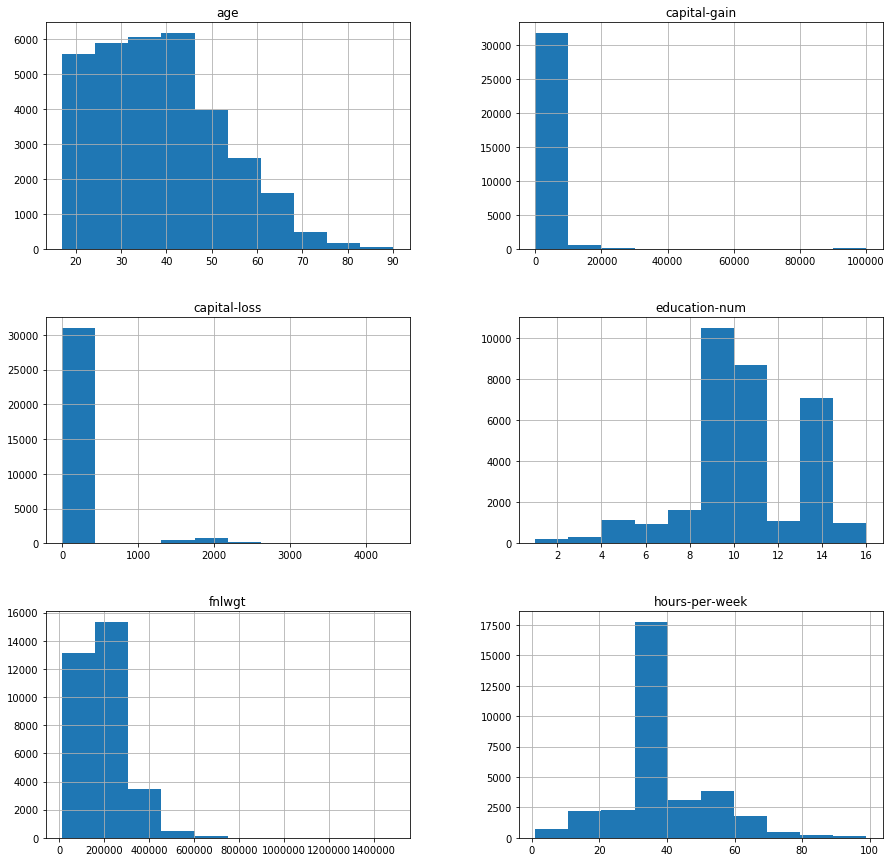

In [82]:
#visualization of data using histograms of numerical attributes
numerical_att.hist(figsize=(15,15))

Inferences: 

1. Age of most individuals is less than 50. Maximum age as seen in plot is 90.
2. Most of the people have capital gain between 0 and 20,000. There are also a small number of outliers who earn upto 100000 via capital-gains.
3. Overall, maximum number of people have capital loss ranging from 0 to 1000. Of the people who have had a capital loss, the average seems to be around 2000.
4. Maximum number of people have had an education-num of 9 or 10.
5. Most of the people work around 40 hrs per week. However there are a few who don’t work and a few who work for almost 100 hours a week.

In [83]:
data.isnull().sum()
# this dataset doesn't have any missing values (although mentioned on the website that there are missing values)

age               0
work-class        0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

The histograms were used to analyze numerical data
For categorical data we can look at frequency distributions

In [84]:
#selecting categorical variables from our dataset
categorical_att = data.select_dtypes(include=['object'])
categorical_att.head()

,work-class,education,marital-status,occupation,relationship,race,sex,native-country,income
0,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
1,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
2,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
3,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K
4,Private,Masters,Married-civ-spouse,Exec-managerial,Wife,White,Female,United-States,<=50K


Analyzing each column one by one

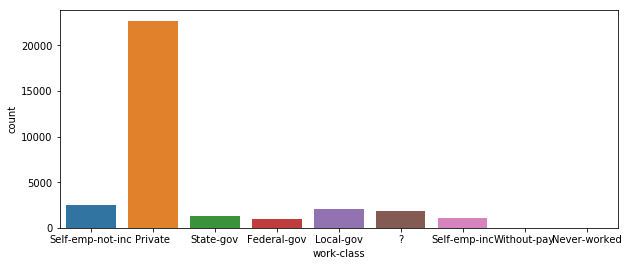

In [85]:
plt.figure(figsize=(10,4))
sns.countplot(data=categorical_att, x='work-class')

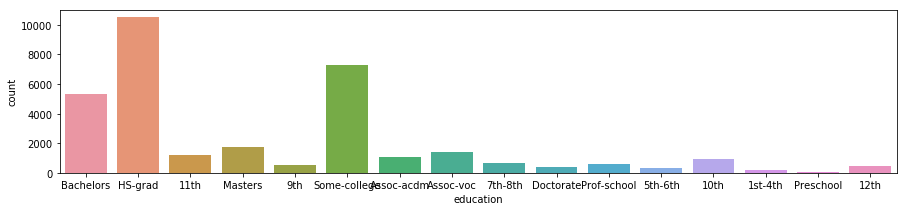

In [86]:
plt.figure(figsize=(15,3))
sns.countplot(data=categorical_att, x='education')

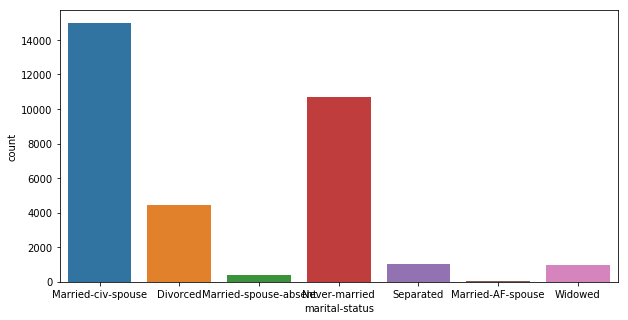

In [87]:
plt.figure(figsize=(10,5))
sns.countplot(data=categorical_att, x='marital-status')

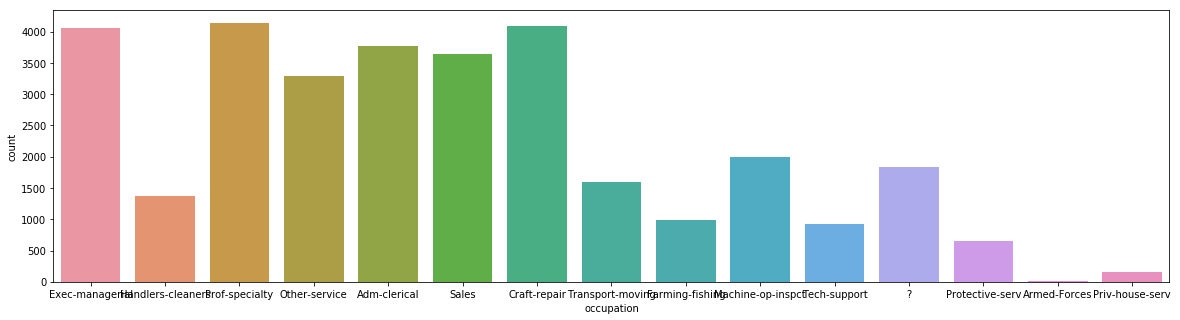

In [88]:
plt.figure(figsize=(20,5))
sns.countplot(data=categorical_att, x='occupation')

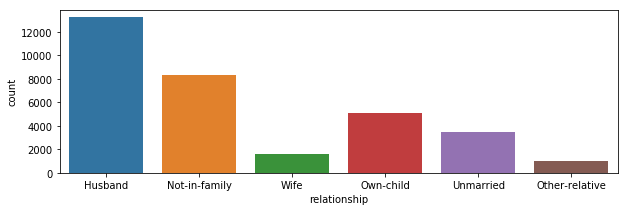

In [98]:
plt.figure(figsize=(10,3))
sns.countplot(data=categorical_att, x='relationship')

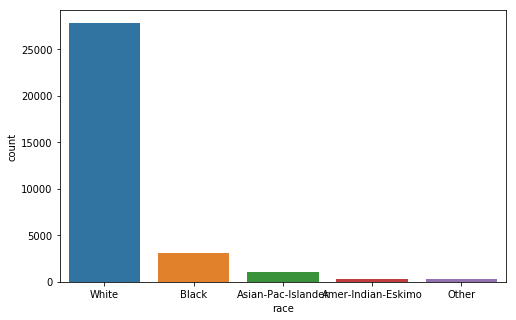

In [104]:
plt.figure(figsize=(8,5))
sns.countplot(data=categorical_att, x='race')

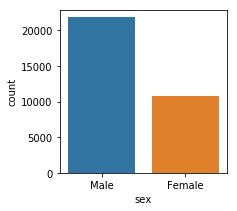

In [107]:
plt.figure(figsize=(3,3))
sns.countplot(data=categorical_att, x='sex')

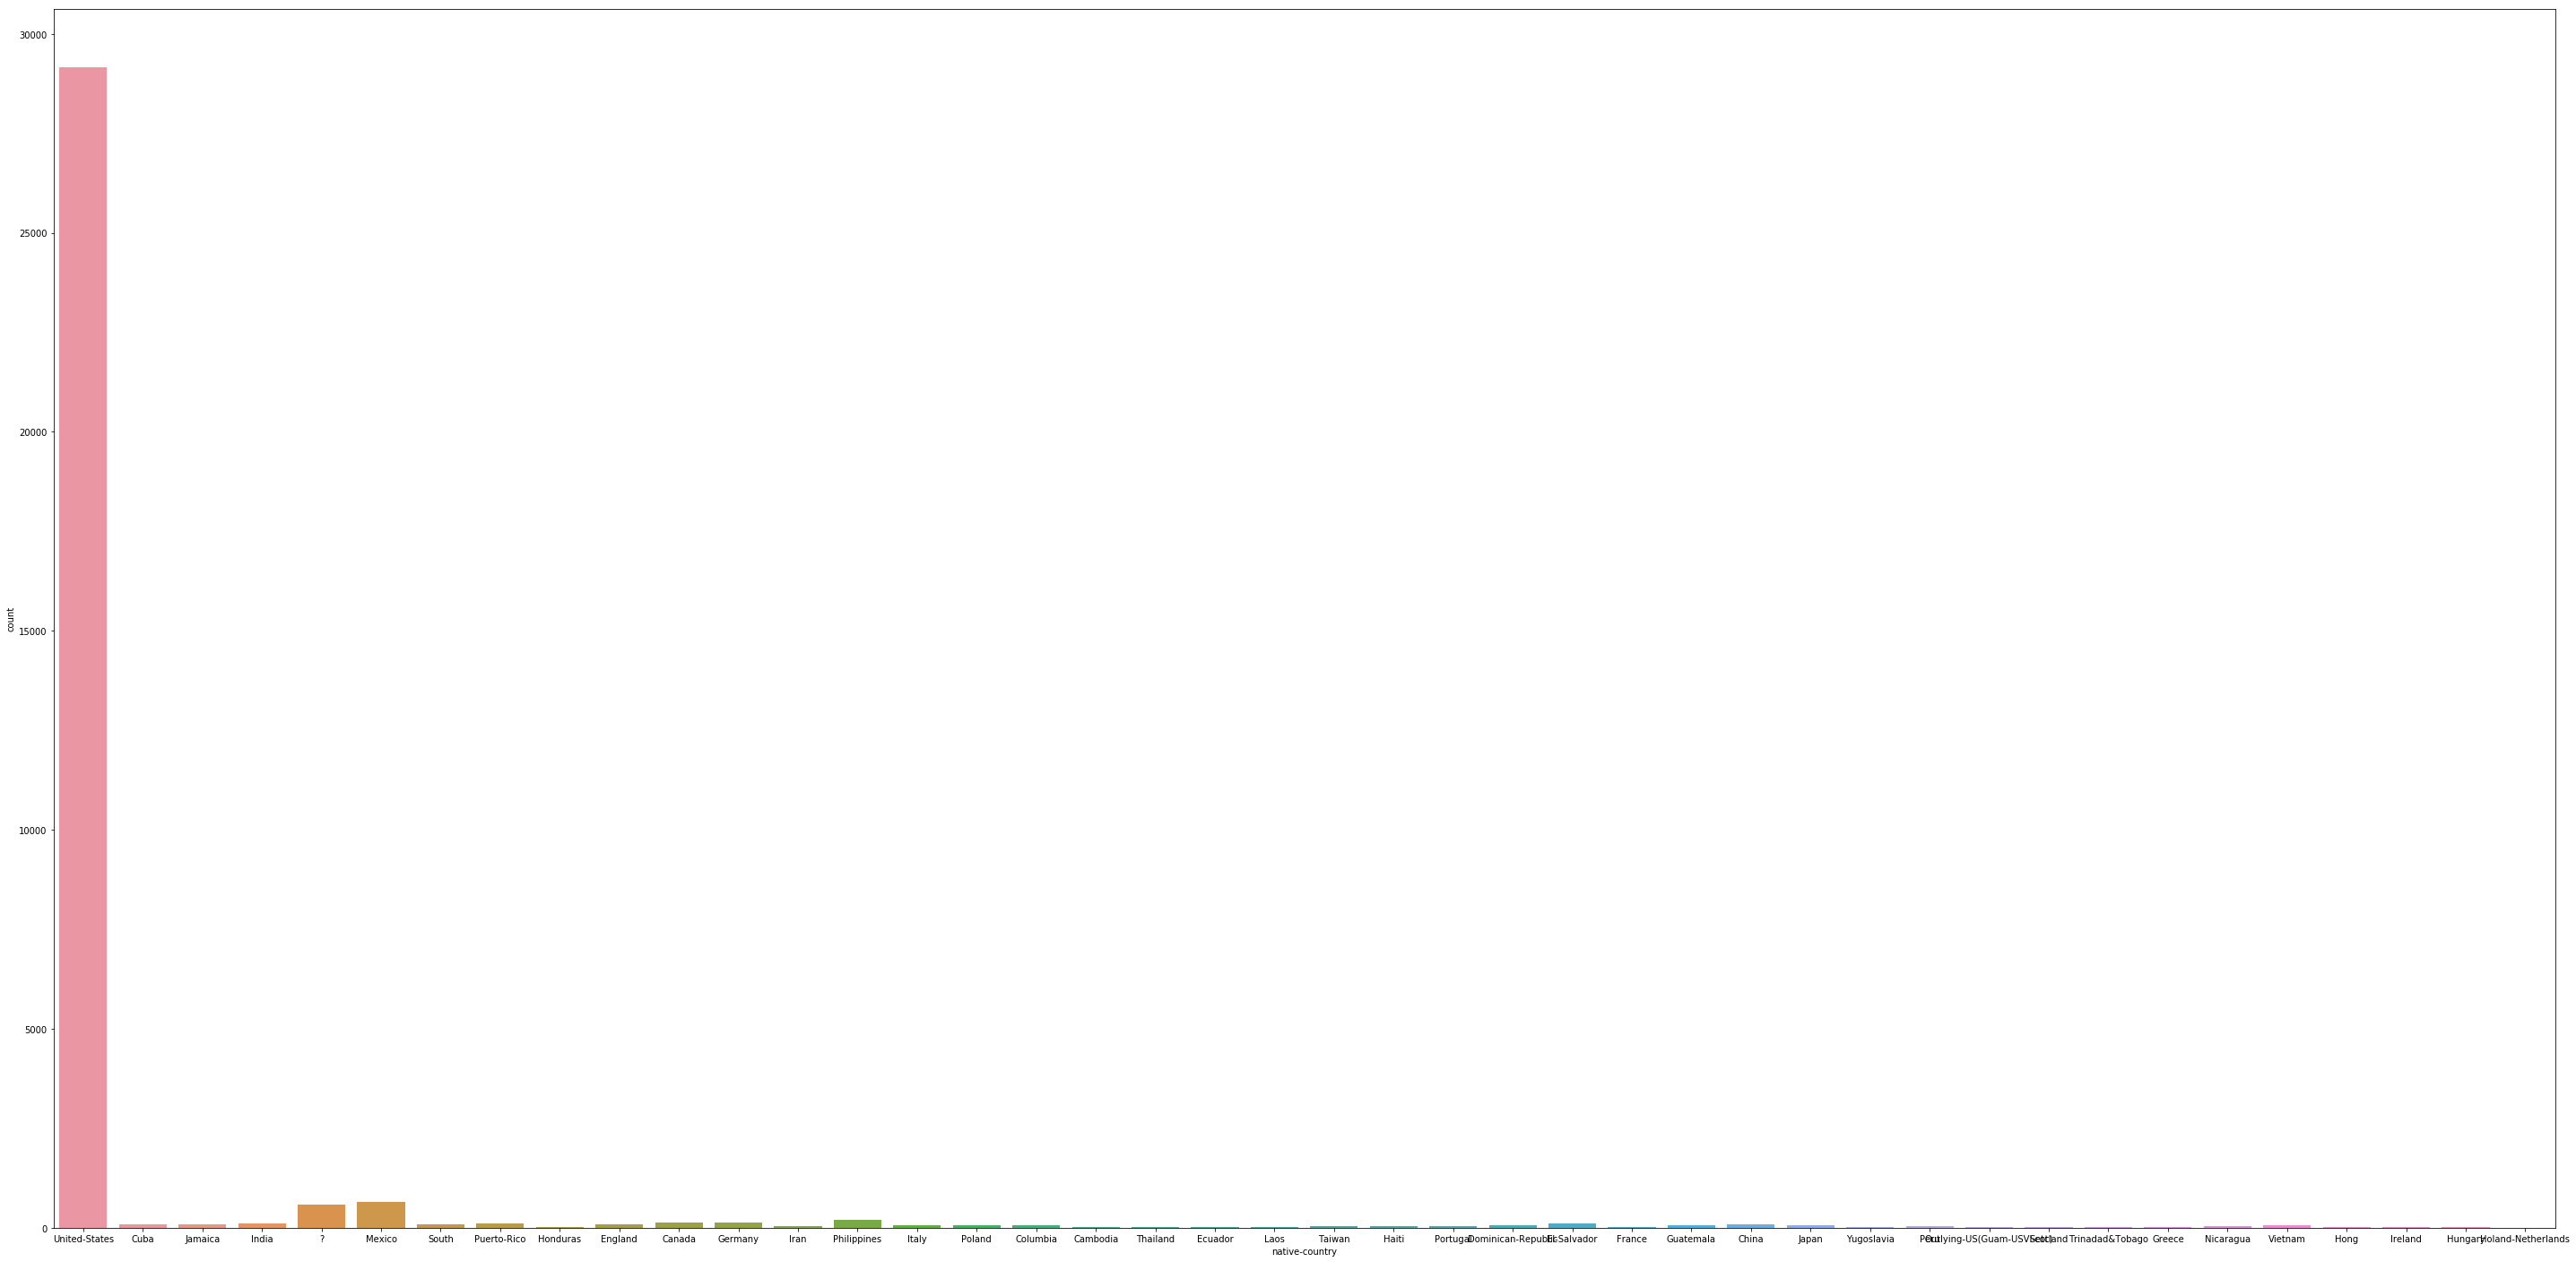

In [112]:
plt.figure(figsize=(50,25))
sns.countplot(data=categorical_att, x='native-country')

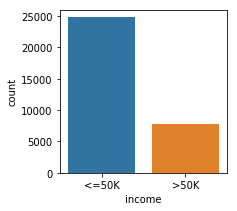

In [113]:
plt.figure(figsize=(3,3))
sns.countplot(data=categorical_att, x='income')

*INFERENCE:*

**1. work-class:**
Maximum number of people belong to private sector and the others are distributes among remaining sectors and From the plot it looks as if there are no people who work without-pay or have never worked. There is also a bar in the graph that says '?' these are missing values.

**2. education:**
Most of the people are high-school grads or have studied in some college, or doing their bachelors. This is same as the education-num attribute, just that each of these values have been assigned a number there. We can use one of the two columns for our model.

**3. marital-status:**
Majority of the population are married. The next highest number is the group of people who have never been married.

**4. occupation:**
There are 14 occupations mentioned of which the least number of people are found in armed forces. There is also a bar that says '?', these represent missing values of occupation in our dataset. There is a good distribution of people over the occupations "Exec-managerial", "Prof-specialty", "adm-clerical", "sales", "craft-repair" and "other-services"

**5. relationship:**
Most of the people are husbands.

**6. race:**
Most of the people belong to "White" race

**7. sex:**
Of the total people,majority of the people are males (over 20,000). The number of females are around 10,000.

**8. native country:**
Maximum people belong to the USA.

**9. income:**
Majority of the people earn <=50k, indicating a skewed dataset as there is not equal number of training examples for both the output categories.

In [114]:
count = 0
for i in range(len(categorical_att['native-country'])):
    if(categorical_att['native-country'][i]=='?'):
        count+=1
print("Missing values in native-country:", count)

Missing values in native-country: 583


In [115]:
count = 0
for i in range(len(categorical_att['work-class'])):
    if(categorical_att['work-class'][i]=='?'):
        count+=1
print("Missing values in work-class:", count)

Missing values in work-class: 1836


In [116]:
count = 0
for i in range(len(categorical_att['occupation'])):
    if(categorical_att['occupation'][i]=='?'):
        count+=1
print("Missing values in occupation:", count)

Missing values in occupation: 1843


In [118]:
print("Total records: ", len(data))

Total records:  32560


As we can see, the the missing values (native-country, occupation and work-class) form a small percent of the entire dataset (1.8%, 5.6% and 5.6% respectively)

So we can eliminate the records having missing values

In [123]:
backup_data = data.copy()

In [147]:
data.head()

,age,work-class,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


**DATA RELATIONSHIPS/CORRELATIONS**


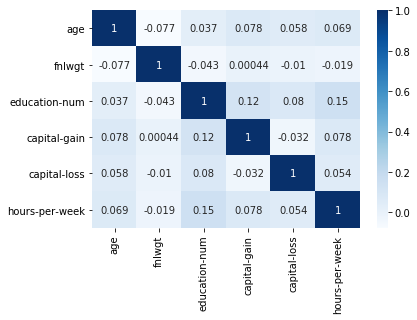

In [160]:
#correlation between all features of the dataset
sns.heatmap(data.corr(), annot=True, cmap='Blues')

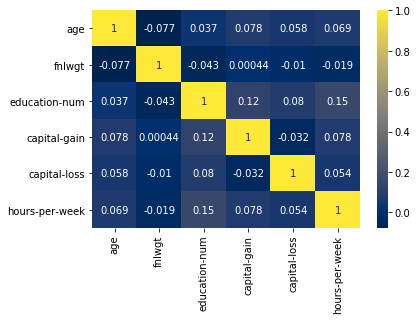

In [162]:
#Correlation between only numerical features
sns.heatmap(numerical_att.corr(), annot=True, cmap='cividis')

*Inference:*

We can see that there is not much correlation among all features.

**Among categorical features, native-country, and education have too many sub-categories**

We can group all native-countries that are not USA into one single group called 'Others'

In [174]:
#Grouping native-country
data['native-country'].head()

0    United-States
1    United-States
2    United-States
3             Cuba
4    United-States
Name: native-country, dtype: object

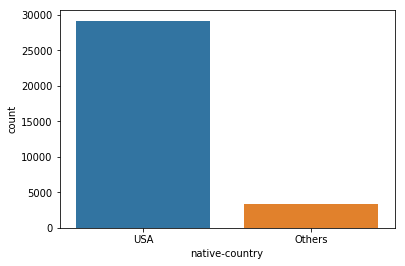

In [172]:
data['native-country'] = data['native-country'].apply(lambda x: "USA" if x=="United-States" else "Others" )
sns.countplot(data=data, x='native-country')

We can see that even after grouping all other countries into one group, majority is still USA